In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


In [2]:
from scipy.misc import face
face = face(gray=True)



# Visualize the Racoon GreyScale image

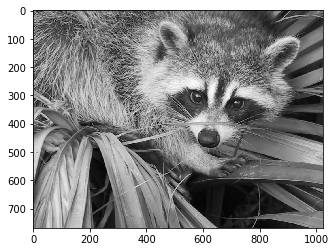

In [3]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(face)
plt.show()

# Resize the Image

In [4]:
face = sp.misc.imresize(face, 0.10) / 255.


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


# Visualize the Resized Racoon GreyScale image

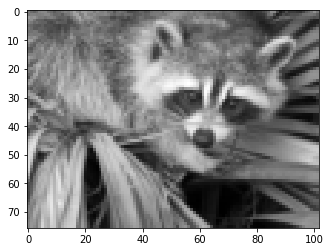

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(face)
plt.show()

In [6]:
graph = image.img_to_graph(face)


In [7]:
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

print(type(graph))
print(graph.shape)

<class 'scipy.sparse.coo.coo_matrix'>
(7752, 7752)


# Visualize the compress racoon grey scale image into 5 clusters.

(7752,)
(76, 102)
[0 1 2 3 4]


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 7.67s
(7752,)
(76, 102)
[0 1 2 3 4]
Spectral clustering: discretize, 9.81s


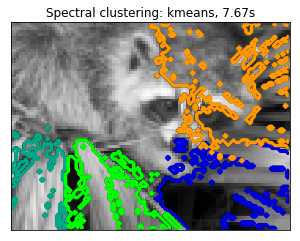

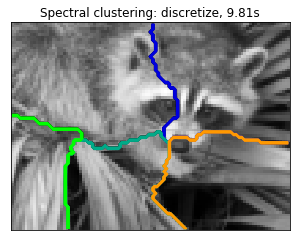

In [8]:
import time
N_REGIONS = 5
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    print(labels.shape)
    labels = labels.reshape(face.shape)
    print(labels.shape)
    print(np.unique(labels))
    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()